<a href="https://colab.research.google.com/github/zahra-sharifzadeh/pytorch/blob/main/AutoEncoders_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
from torch.utils.data import dataloader
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data',
                            train=True,
                            download=True,
                            transform=transform)

data_loader = torch.utils.data.DataLoader(
    dataset=mnist_data,
    batch_size=64,
    shuffle=True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 314726695.82it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 35817768.72it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 114699008.17it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10450098.06it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:

images, labels = next(iter(data_loader))
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


# Simple AutoEncoder

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 12),
        nn.ReLU(),
        nn.Linear(12, 3)
        )

    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.ReLU(),
        nn.Linear(12, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid() # fixing the value between 0 to 1
        )


  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded



In [ ]:
model = Autoencoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=1e-3)

In [ ]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
  for (img, _) in data_loader:
    img = img.reshape(-1, 28*28)
    recon = model(img)
    loss = criterion(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch: { epoch+1} | Loss:{loss.item():.4f}')
  outputs.append((epoch, img, recon))

Epoch: 1 | Loss:0.0564
Epoch: 2 | Loss:0.0348
Epoch: 3 | Loss:0.0340
Epoch: 4 | Loss:0.0369
Epoch: 5 | Loss:0.0322
Epoch: 6 | Loss:0.0326
Epoch: 7 | Loss:0.0347
Epoch: 8 | Loss:0.0339
Epoch: 9 | Loss:0.0383
Epoch: 10 | Loss:0.0278


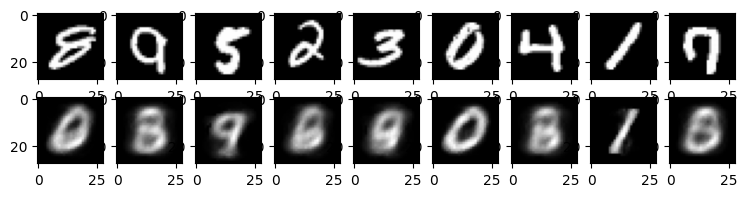

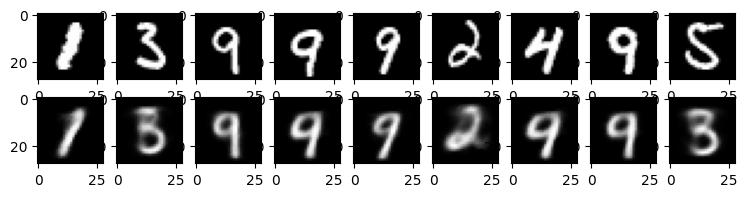

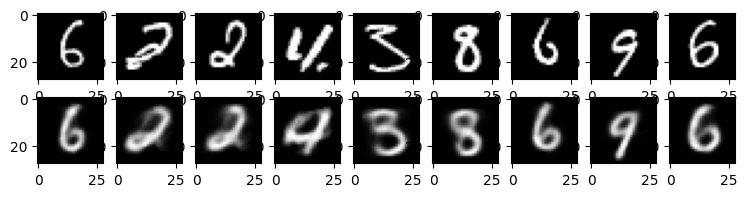

In [ ]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

#CNN_AutoEncoder

In [ ]:
class CNN_Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1, 16, 3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 64, 7),

        )

    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64, 32, 7),
        nn.ReLU(),
        nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
        nn.Sigmoid() # fixing the value between 0 to 1
        )


  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded



In [ ]:
cnn_model = CNN_Autoencoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(cnn_model.parameters(),
                             lr=1e-3)

In [ ]:
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
  for (img, _) in data_loader:
    recon = cnn_model(img)
    loss = criterion(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch: { epoch+1} | Loss:{loss.item():.4f}')
  outputs.append((epoch, img, recon))

Epoch: 1 | Loss:0.0100
Epoch: 2 | Loss:0.0051
Epoch: 3 | Loss:0.0046
Epoch: 4 | Loss:0.0031
Epoch: 5 | Loss:0.0034
Epoch: 6 | Loss:0.0031
Epoch: 7 | Loss:0.0028
Epoch: 8 | Loss:0.0025
Epoch: 9 | Loss:0.0023
Epoch: 10 | Loss:0.0026


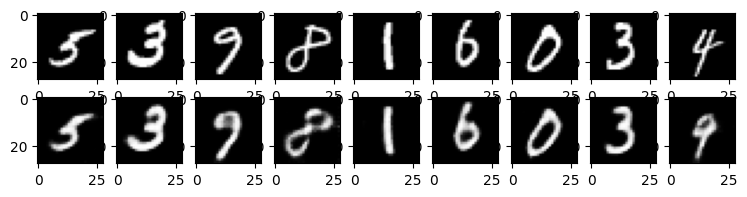

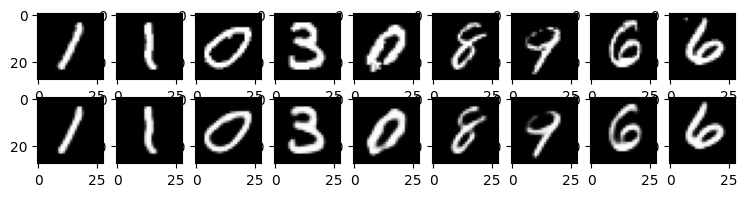

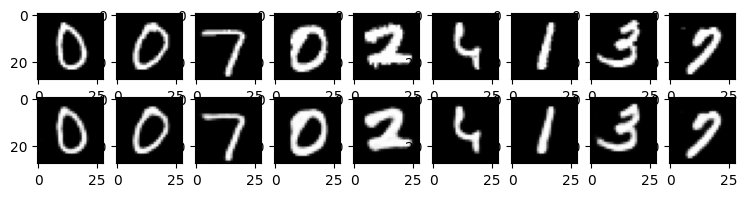

In [ ]:
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

# Variantional AutoEncoder

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:

# input_img -> hidden dim -> mean, std -> parametrization trick -> Decoder -> Output img
class VariantionalAutoencoder(nn.Module):
  def __init__(self,
               input_dim,
               h_dim=200,
               z_dim=20):
    super().__init__()
    # encoder
    self.img_2hid = nn.Linear(input_dim, h_dim)
    self.hid_2mu = nn.Linear(h_dim, z_dim)
    self.hid_2sigma = nn.Linear(h_dim, z_dim)
    # decoder
    self.z_2hid = nn.Linear(z_dim, h_dim)
    self.hid_2img = nn.Linear(h_dim, input_dim)

    self.relu = nn.ReLU()


  def encode(self, x):
    h = self.relu(self.img_2hid(x))
    mu, sigma = self.hid_2mu(h), self.hid_2sigma(h)
    return mu, sigma

  def decode(self, z):
    h = self.relu(self.z_2hid(z))
    h2i = self.hid_2img(h)
    recon = torch.sigmoid(h2i)
    return recon


  def forward(self, x):
    mu, sigma = self.encode(x)
    epsilon = torch.rand_like(sigma)
    z_reparametrized = mu + sigma * epsilon
    z_reconstructed = self.decode(z_reparametrized)
    return z_reconstructed, mu, sigma



In [22]:
x = torch.randn(4, 28*28)
vae = VariantionalAutoencoder(input_dim=784)
z_reconstructed, mu, sigma = vae(x)
z_reconstructed.shape, mu.shape, sigma.shape

(torch.Size([4, 784]), torch.Size([4, 20]), torch.Size([4, 20]))

# VAE On Mnist

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.utils import save_image
from tqdm import tqdm
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [40]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

INPUT_DIM = 784
H_DIM = 200
Z_DIM = 20

NUM_EPOCHS = 10
BATCH_SIZE = 32
LR_RATE = 3e-4




train_loader = torch.utils.data.DataLoader(
    dataset=mnist_data,
    batch_size=BATCH_SIZE,
    shuffle=True)


model = VariantionalAutoencoder(input_dim=INPUT_DIM,
                                h_dim = H_DIM,
                                z_dim= Z_DIM).to(DEVICE)

optimizer = optim.Adam(model.parameters(),
                        lr=LR_RATE)
loss_fn = nn.BCELoss()


In [ ]:
from tqdm import tqdm

for epoch in range(NUM_EPOCHS):
  loop = tqdm(enumerate(train_loader))

  for i, (x, y) in loop:
    x = x.to(DEVICE).view(-1, INPUT_DIM)
    y = y.to(DEVICE)

    x_reconstructed, mu, sigma = model(x)

    reconstruction_loss = loss_fn(x_reconstructed, x)
    kl_div = -torch.sum(1 + torch.log(sigma.pow(2)) - mu.pow(2) - sigma.pow(2))

    loss = reconstruction_loss + kl_div
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loop.set_postfix(loss=loss.item())



1875it [00:25, 72.57it/s, loss=33.7]
1875it [00:25, 74.77it/s, loss=3.92]
1875it [00:25, 72.69it/s, loss=1.1]
1875it [00:25, 74.17it/s, loss=0.519]
718it [00:09, 73.83it/s, loss=0.507]

In [ ]:
def inference(digit, num_examples=1):
    """
    Generates (num_examples) of a particular digit.
    Specifically we extract an example of each digit,
    then after we have the mu, sigma representation for
    each digit we can sample from that.

    After we sample we can run the decoder part of the VAE
    and generate examples.
    """
    images = []
    idx = 0
    for x, y in mnist_data:
        if y == idx:
            images.append(x)
            idx += 1
        if idx == 10:
            break

    encodings_digit = []
    for d in range(10):
        with torch.no_grad():
            mu, sigma = model.encode(images[d].view(1, 784))
        encodings_digit.append((mu, sigma))

    mu, sigma = encodings_digit[digit]

    for example in range(num_examples):
        epsilon = torch.randn_like(sigma)
        z = mu + sigma * epsilon
        out = model.decode(z)
        out = out.view(-1, 1, 28, 28)
        print(out.shape)
        save_image(out, f"generated_{digit}_ex{example}.png")


In [ ]:
inference(digit=1, num_examples=1)